# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src='Data_files\LEGO Notebook and Data (start)\assets\bricks.jpg'>

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_rows', 6)

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors_df = pd.read_csv(r'Data_files\LEGO Notebook and Data (start)\data\colors.csv')
colors_df.head(3)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f


In [3]:
colors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [4]:
# colors_df['name'].unique().size
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
colors_df['name'][colors_df['is_trans'] == 't'].nunique()
colors_df.loc[colors_df['is_trans'] == 't', 'name'].nunique()

28

In [6]:
colors_df['name'][colors_df['is_trans'] == 'f'].nunique()
colors_df.loc[colors_df['is_trans'] == 'f', 'name'].nunique()

107

In [7]:
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [8]:
colors_df['is_trans'].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<!-- <img src='Data_files\LEGO Notebook and Data (start)\assets\lego_themes.png'> -->

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='Data_files\LEGO Notebook and Data (start)\assets\lego_sets.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [9]:
sets_df = pd.read_csv(r'Data_files\LEGO Notebook and Data (start)\data\sets.csv')
sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


In [10]:
sets_df.head(3)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0


In [11]:
sets_df.describe()

,year,theme_id,num_parts
count,"15,710.00","15,710.00","15,710.00"
mean,"2,004.53",387.17,166.04
std,13.99,201.27,369.69
...,...,...,...
50%,"2,009.00",443.00,45.00
75%,"2,015.00",524.00,165.00
max,"2,021.00",709.00,"9,987.00"


In [12]:
sets_df.loc[sets_df['num_parts'].idxmax(), :]

set_num                           BIGBOX-1
name         The Ultimate Battle for Chima
year                                  2015
theme_id                               571
num_parts                             9987
Name: 15004, dtype: object

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [13]:
first_year_df = sets_df[sets_df['year'] == sets_df['year'].min()]
first_year_df

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [14]:
first_year_df['name'].nunique()

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [15]:
sets_df.sort_values(by='num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

Text(0.5, 1.0, 'Unique set numbers')

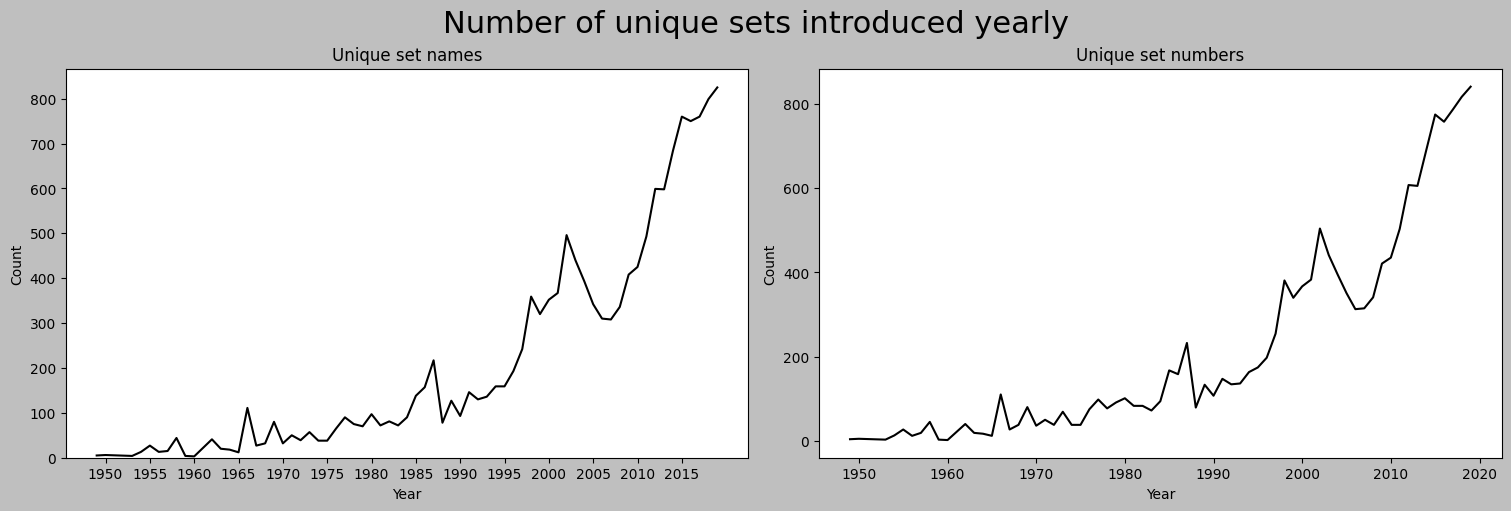

In [16]:
unique_set_numbers_n = sets_df.groupby('year')['set_num'].nunique()[:-2]
unique_names_n = sets_df.groupby('year')['name'].nunique()[:-2]

plt.style.use('grayscale')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
fig.suptitle('Number of unique sets introduced yearly', fontsize=22)

ax1.plot(
    unique_names_n.index,
    unique_names_n
)
ax1.set_xticks(np.arange(unique_names_n.index.min()+1, unique_names_n.index.max(), 5))
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Unique set names', fontsize=12)
ax1.set_ylim(0, None)

ax2.plot(
    unique_set_numbers_n.index,
    unique_set_numbers_n
)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Unique set numbers', fontsize=12)

In [17]:
sets_df.head(3)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [18]:
themes_by_year = sets_df.groupby('year')['theme_id'].nunique()

#### 2nd way

In [19]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': 'nunique'})

themes_by_year_series = themes_by_year['theme_id']

themes_by_year_series.equals(sets_df.groupby('year')['theme_id'].nunique())

True

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

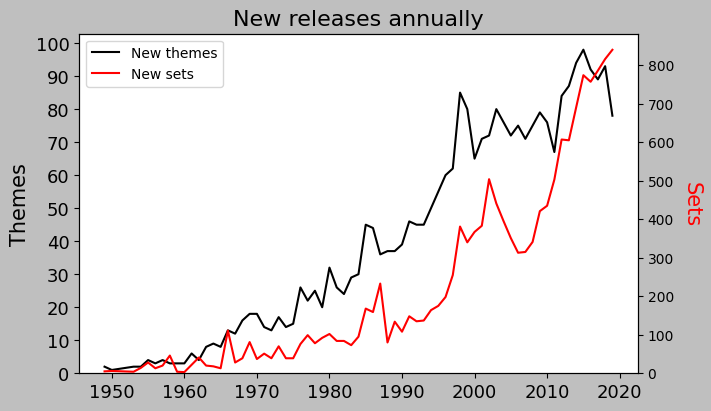

In [20]:
fig, ax1 = plt.subplots(figsize=(7, 4), layout='constrained')

line1, = ax1.plot(
    themes_by_year.index[:-2],
    themes_by_year['theme_id'][:-2],
    label='New themes'
)
ax1.set_title('New releases annually', fontsize=16)
ax1.tick_params(labelsize=13)
ax1.set_yticks(np.arange(0, 101, 10))
ax1.set_ylim(0)
ax1.set_ylabel('Themes', fontsize=15)

ax2 = ax1.twinx()

line2, = ax2.plot(
    unique_set_numbers_n.index,
    unique_set_numbers_n,
    color='red',
    label='New sets'
)
ax2.set_ylim(0)
ax2.set_ylabel('Sets', fontsize=15, color='red', rotation=270, labelpad=20)

ax2.legend(handles=[line1,  line2])

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [21]:
parts_per_set_avg = sets_df.groupby('year').agg({'num_parts': 'mean'})
parts_per_set_avg

,num_parts
year,
1949,99.60
1950,1.00
1953,13.50
...,...
2019,207.51
2020,259.73
2021,0.00


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

Text(0.5, 1.0, 'Average number of parts per set annually')

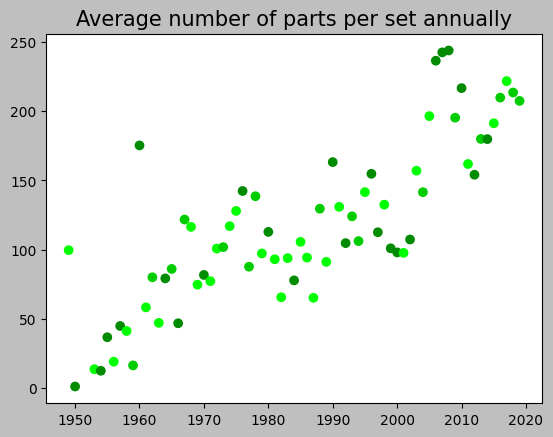

In [22]:
plt.scatter(
    parts_per_set_avg.index[:-2],
    parts_per_set_avg[:-2],
    c=[random.choice(['#008b00', '#00cd00', '#00ff00']) for dot in range(len(parts_per_set_avg[:-2]))]
)
plt.title('Average number of parts per set annually', fontsize=15)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [23]:
sets_df['theme_id'].value_counts()

theme_id
158    753
501    656
494    398
      ... 
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src='Data_files\LEGO Notebook and Data (start)\assets\rebrickable_schema.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [24]:
themes_df = pd.read_csv(r'Data_files\LEGO Notebook and Data (start)\data\themes.csv')
print(f'Shape: {themes_df.shape}')
themes_df.head(3)

Shape: (596, 3)


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.00
2,3,Competition,1.00


In [25]:
themes_df.nunique()

id           596
name         422
parent_id     68
dtype: int64

In [26]:
star_wars_themes = themes_df[themes_df['name'] == 'Star Wars']
star_wars_themes

,id,name,parent_id
17,18,Star Wars,1.00
150,158,Star Wars,NaN
174,209,Star Wars,207.00
211,261,Star Wars,258.00


In [27]:
sets_df[sets_df['theme_id'].isin(star_wars_themes['id'])]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
...,...,...,...,...,...
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


### Merging (i.e., Combining) DataFrames based on a Key


In [28]:
full_df = pd.merge(
    sets_df,
    themes_df[['id', 'name']],
    left_on='theme_id',
    right_on='id',
    how='inner'
)

full_df.drop(axis=1, labels='id', inplace=True)
full_df.rename(columns={'name_x': 'set_name', 'name_y': 'theme_name'}, inplace=True)

full_df

,set_num,set_name,year,theme_id,num_parts,theme_name
0,001-1,Gears,1965,1,43,Technic
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,Lion Knights
...,...,...,...,...,...,...
15707,XWING-1,Mini X-Wing Fighter,2019,158,60,Star Wars
15708,XWING-2,X-Wing Trench Run,2019,158,52,Star Wars
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,Star Wars


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars'),
  Text(1, 0, 'Gear'),
  Text(2, 0, 'Basic Set'),
  Text(3, 0, 'Supplemental'),
  Text(4, 0, 'Technic'),
  Text(5, 0, 'Friends'),
  Text(6, 0, 'Ninjago'),
  Text(7, 0, 'Town'),
  Text(8, 0, 'Key Chain'),
  Text(9, 0, 'Books')])

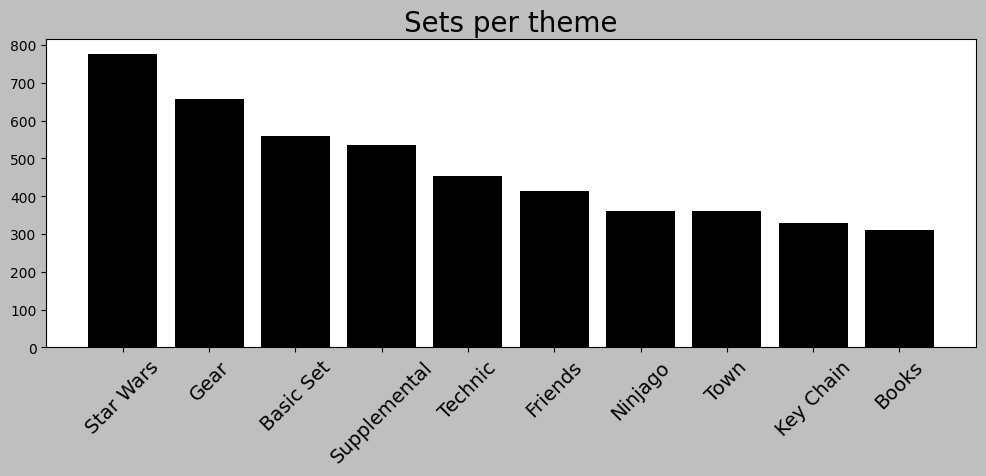

In [29]:
sets_per_theme = full_df.groupby('theme_name').agg({'set_num': 'count'}).sort_values(by='set_num', ascending=False)[:10]
sets_per_theme.rename(columns={'set_num': 'set_count'}, inplace=True)
sets_per_theme

plt.figure(figsize=(12, 4))
plt.bar(
    sets_per_theme.index,
    sets_per_theme['set_count']
)
plt.title('Sets per theme', fontsize=20)
plt.xticks(fontsize=14, rotation=45)

In [30]:
full_df.groupby('theme_name').agg({'set_num': 'count'}).sort_values(by='set_num', ascending=False)

,set_num
theme_name,
Star Wars,776
Gear,656
Basic Set,558
...,...
RC Train,1
Skull Spiders,1
eLAB,1


In [31]:
full_df.groupby('theme_id').agg({'set_num': 'count'}).sort_values(by='set_num', ascending=False)

,set_num
theme_id,
158,753
501,656
494,398
...,...
200,1
509,1
368,1


In [36]:
sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


In [43]:
sets_df.count()

set_num      15710
name         15710
year         15710
theme_id     15710
num_parts    15710
dtype: int64